# **Aprendizaje No Supervisado: PCA y Data Clustering con K-Means**

En este notebook nos ponemos a clusterizar pokemones con algoritmos de image recognition mediante K-Means previa reducción de dimensionalidad con PCA, para luego analizar sus métricas de combate.

In [1]:
#Cargamos archivos que tienen los nombres y los sprites:

from google.colab import drive
import pickle
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']

Mounted at /content/drive


espeon
(56, 68)


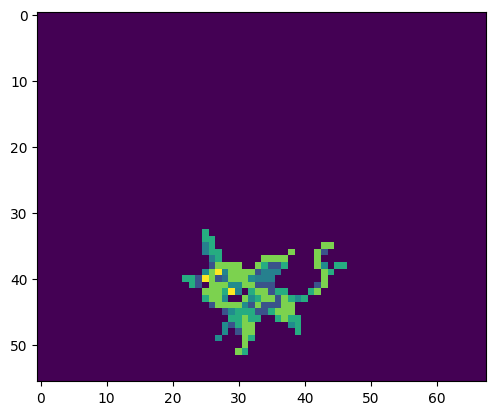

In [2]:
#La variable nombres es una lista con los nombres mientras que imagenes tiene los sprites correspondientes,
#en el mismo orden. Podemos examinarlos uno por uno:

import matplotlib.pyplot as plt

n=100  #elijo el número de Pokémon que quiero visualizar
plt.imshow(imagenes[n])
print(nombres[n]) # nombre del Pokémon
print(imagenes[n].shape) # tamaño del sprite (todos tienen el mismo tamaño)

In [3]:
#Por otro lado, la información sobre los atributos de cada Pokémon (función) esta en un dataframe aparte:

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [4]:
#Para poder trabajar con algoritmos de reducción de la dimensión y clustering,
#primero tenemos que representar los datos de sprites como una matriz, para eso tenemos que "desenrollarlos" como vimos en clase:

data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img

In [5]:
# EJERCICIO 1:
# Tenemos que verificar (usando Silhouette) que existe un max local en k=8 ckusters
# Luego aplicar el algoritmo de kmeans con k = 8 y ver como clasifico a los bichos


#importamos las librerias que vamos a utilizar:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
#vamos a reducir la dimensionalidad de las imagenes en sus componentes principales,
# con #PCA = 100

pca = PCA(n_components = 100)

# Ajuste y transformación de los datos
pca.fit(data)
data_pca = pca.transform(data)

#type(data_pca)

In [ ]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []
n = len(nombres) # = 698 nombres

for k in range(2, 20):
     kkmeans = KMeans(n_clusters=k)
     kkmeans.fit(data_pca)
     score = silhouette_score(data_pca, kkmeans.labels_)
     silhouette_coefficients.append(score)

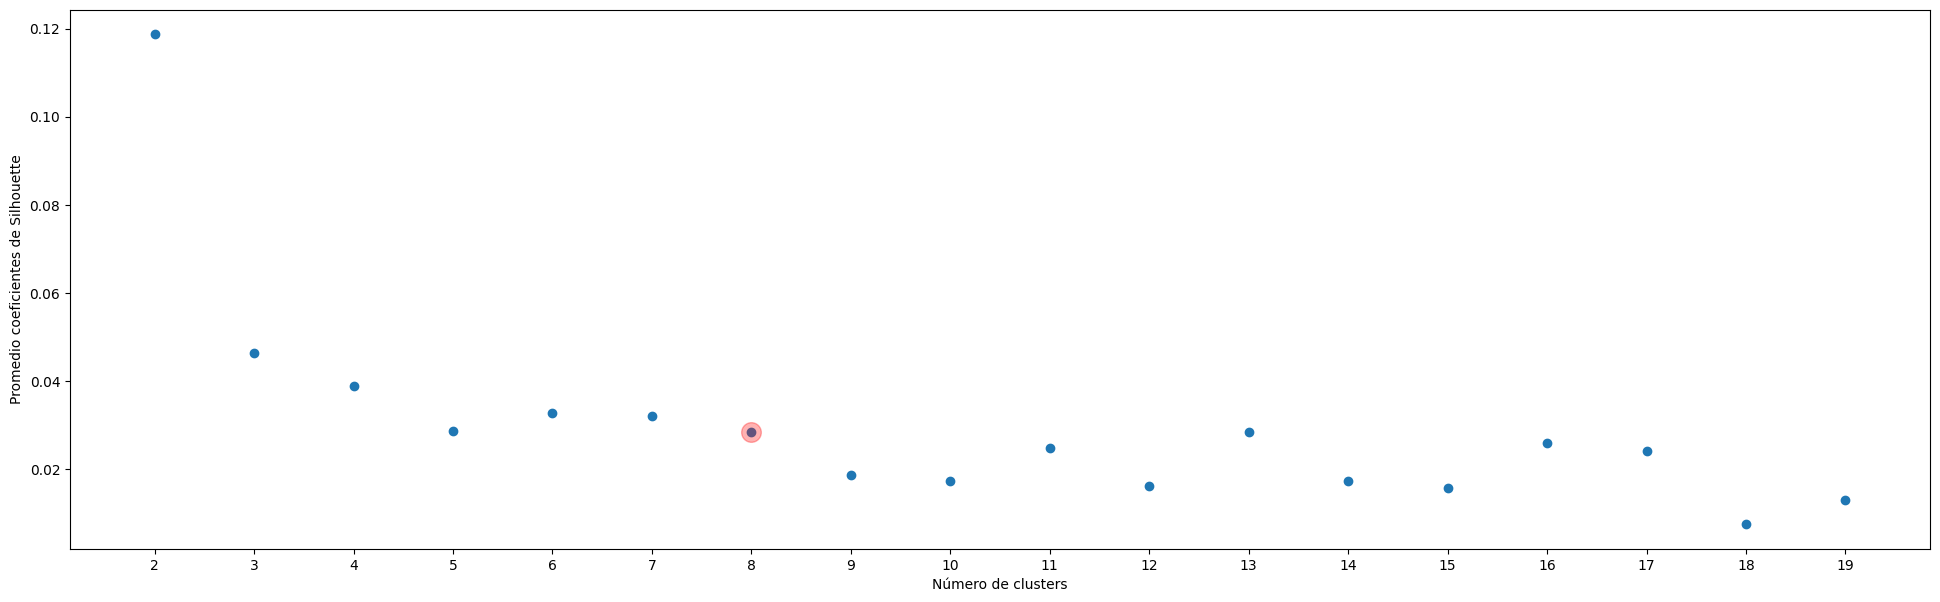

In [8]:
#Ploteamos los coefs de silhouette:


fig, ax = plt.subplots(figsize = (24, 7))

ax.scatter(range(2, 20), silhouette_coefficients)
ax.scatter(8, silhouette_coefficients[6], color='red', s=200, alpha=0.3) # agregamos un punto rojo al plot en el lugar donde k = 8

ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

plt.savefig("coefs_silhouette_k698.png")

Vemos que hay un minimo local cerca de k=8 :)

In [9]:
#ahora aplicamos el algortimo de kmeans en k =8

# Creación del modelo KMeans con k = 8
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [10]:
# EJERCICIO 2: Visualizar los clusters segun los primeros dos componentes de la matriz de imagenes

Text(0, 0.5, 'Segunda componente principal')

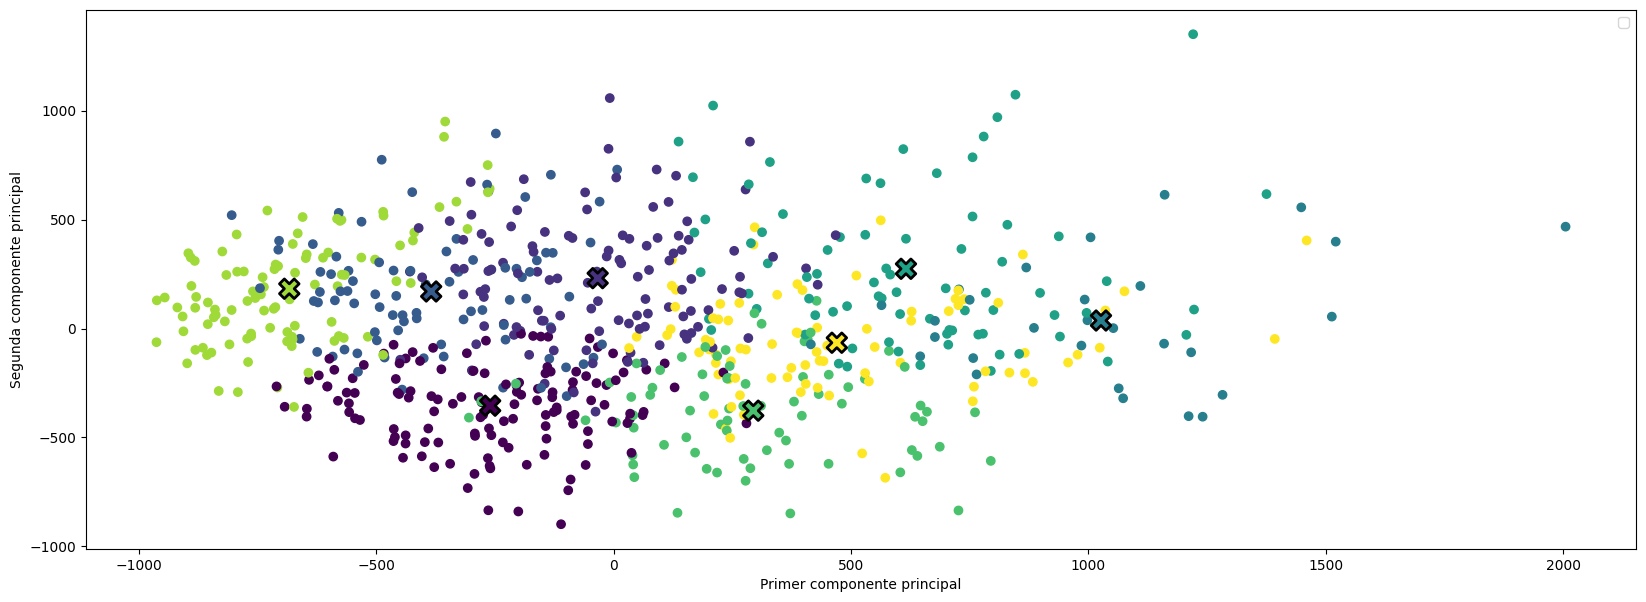

In [11]:
# Guardamos la posición de los centroids
centroids8 = kmeans.cluster_centers_

# Ploteamos los clusters segun los primeros 2 pca de imagenes
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids8[:, 0], centroids8[:, 1], marker="X", s=200, linewidths=2,
            c=np.unique(kmeans.labels_),edgecolors='black')
ax.legend()

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

In [12]:
# EJERCICIO 3: Visualizar los primeros 10 eltos de cada cluster

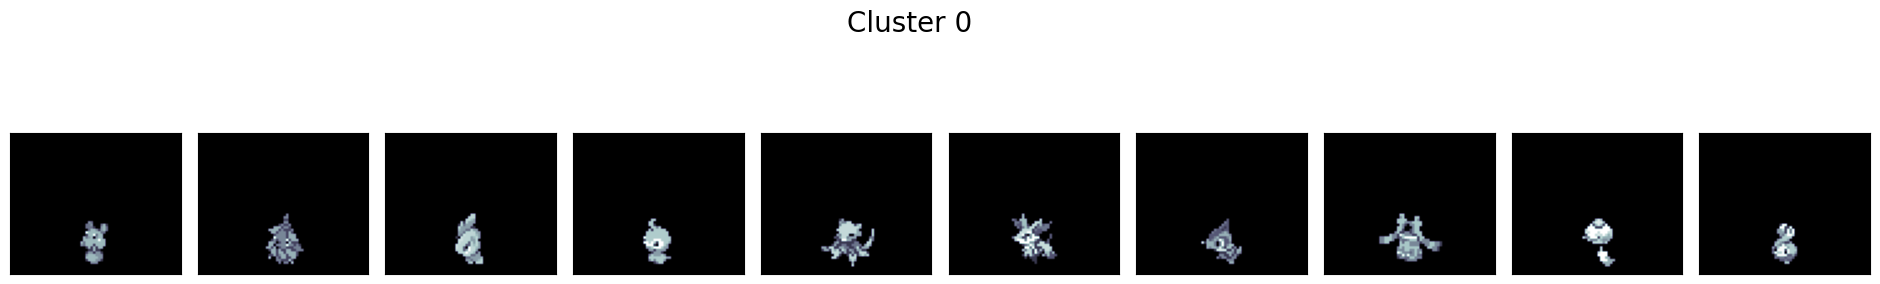

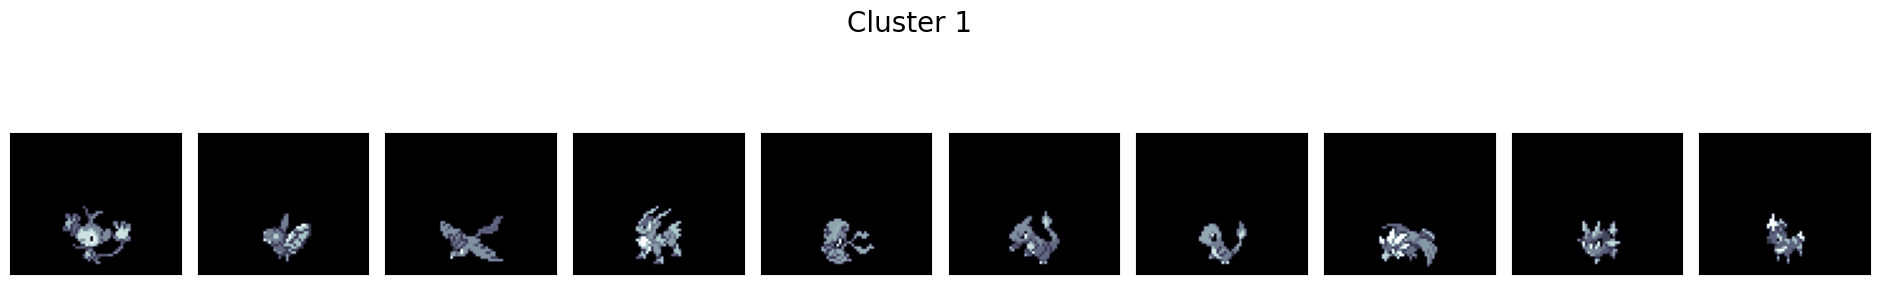

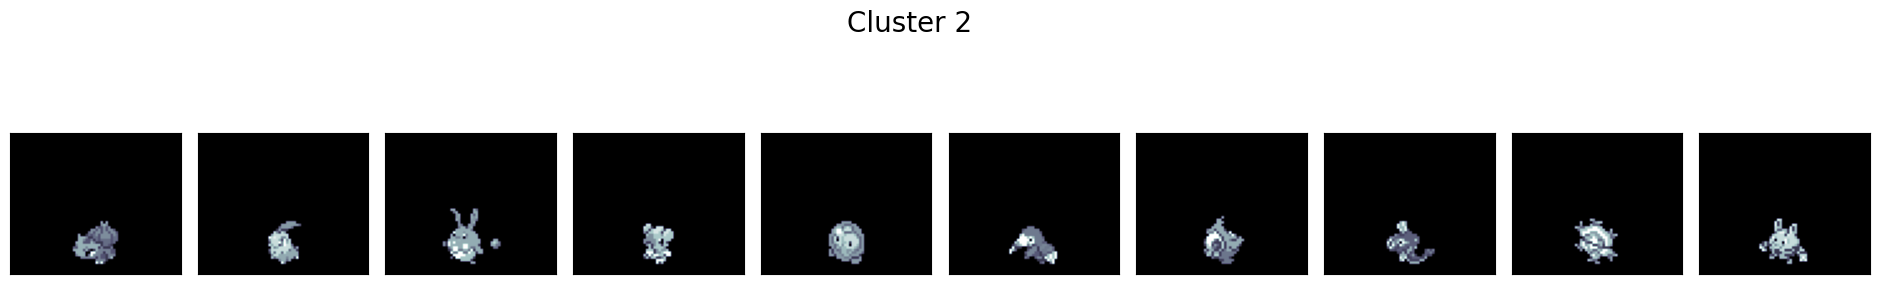

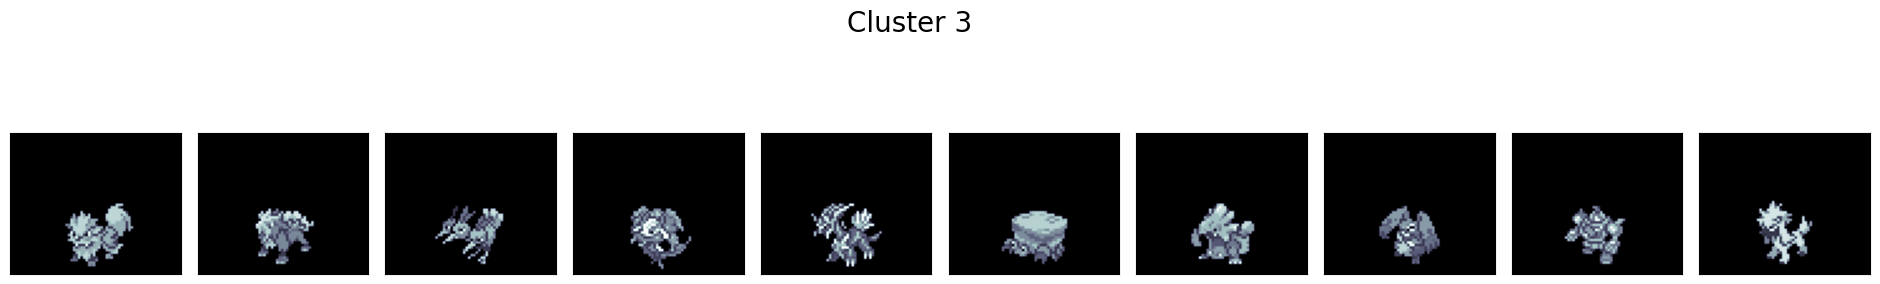

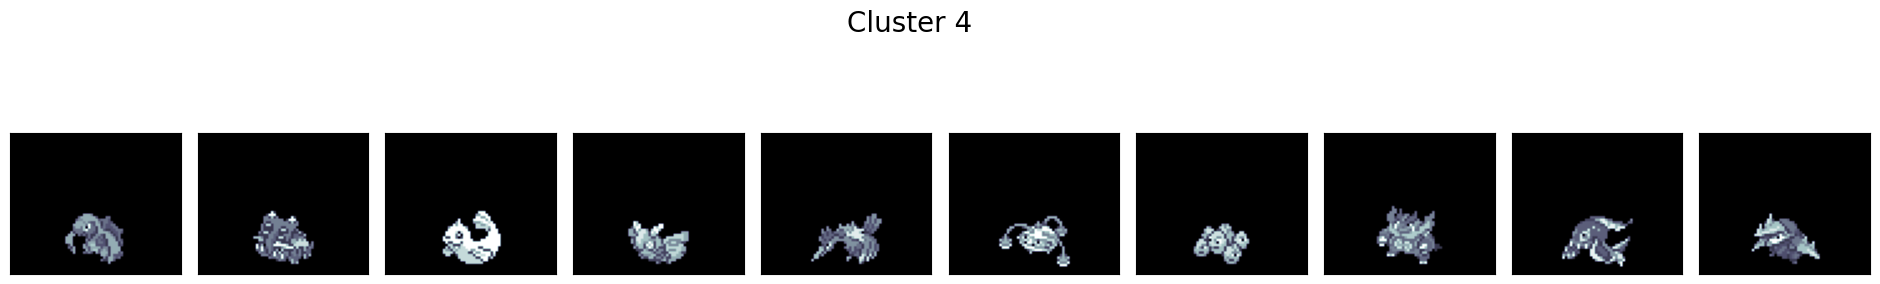

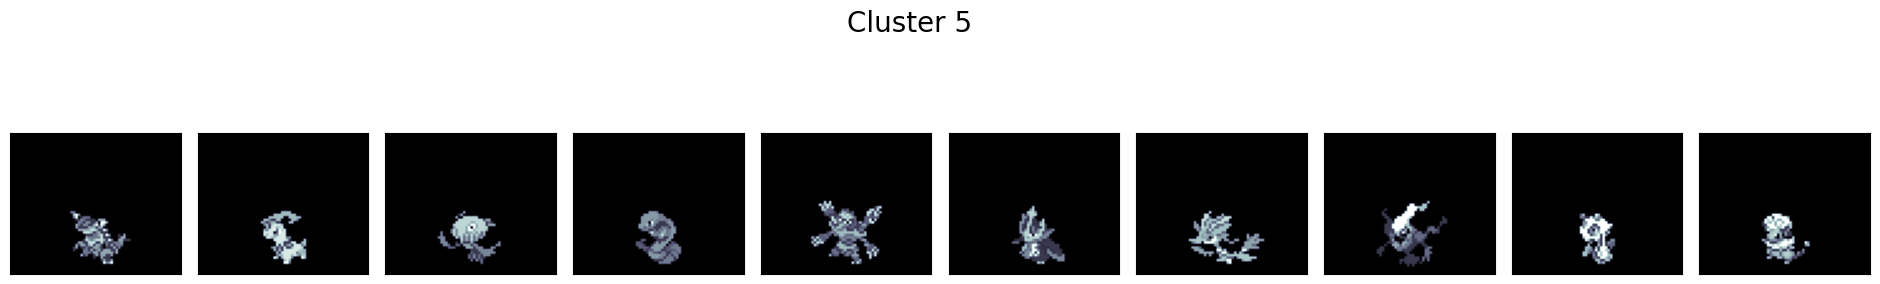

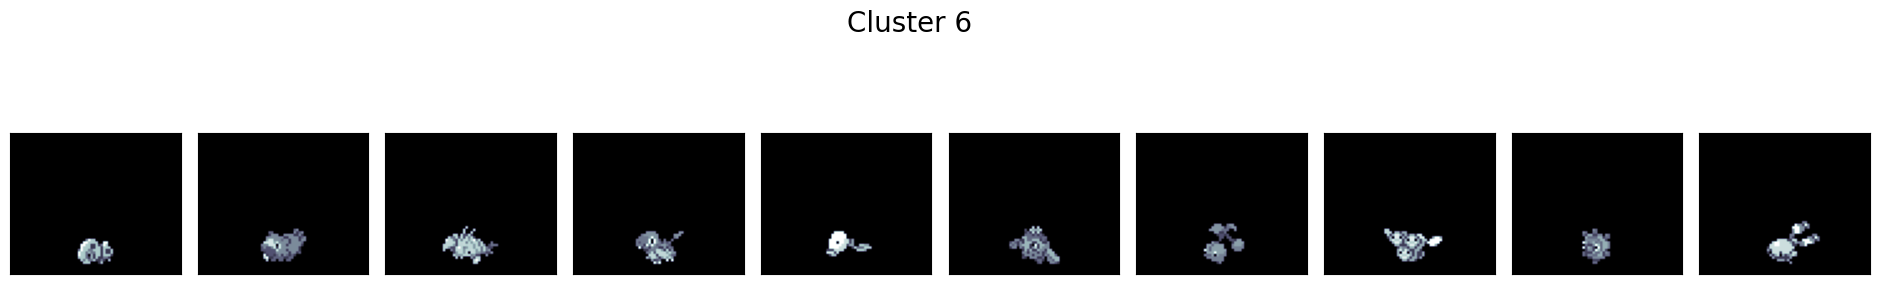

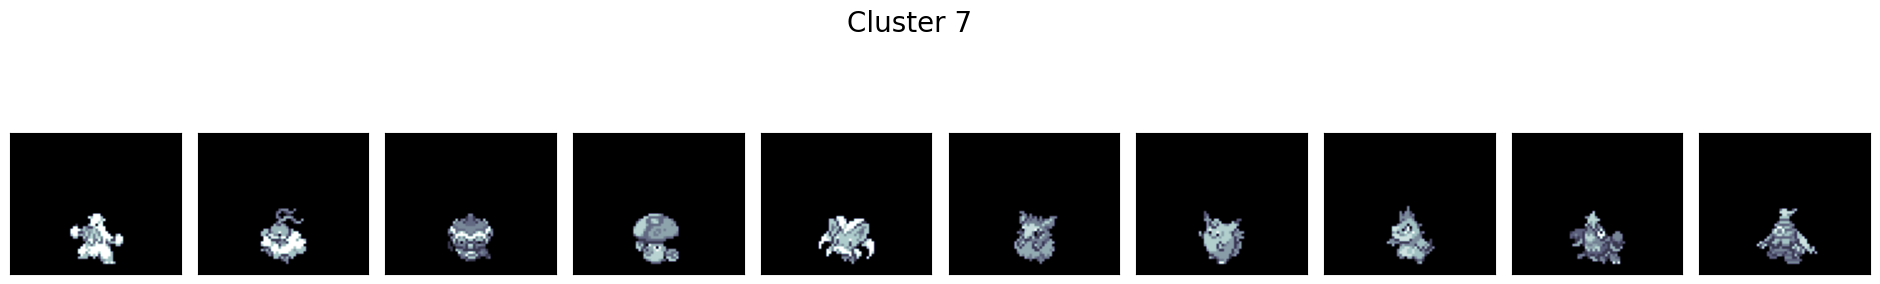

In [13]:
labels = kmeans.labels_

# Iniciamos un for con k=8 iteraciones
for i in range(8):
    index = np.nonzero(labels==i)[0]                                  # los índices correspondientes a la i-ésima etiqueta
    num = 10                                                          # el número de samples en cada cluster
    pokemons = data[index].reshape(len(index), 56, 68)                # reshapeamos los samples del i-ésimo cluster para que tenga el formato de imagen
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(pokemons[i], cmap='bone')

In [14]:
# EJERCICIO 4 tenemos que mostrar un histograma con los promedios de medidas de cada cluster
#a saber, tenemos que mostrar avg de: HP, Attack, Defense y Speed

In [15]:
#primero, agregamos las etiquetas creadas con kmeans de cada bicho al df

df['cluster_label'] = 0

for i, nombre in enumerate(nombres):            #este i va a ser el mismo que recorre las etiquetas del kmeans: labels
  i_pok = df.loc[df['Name'] == nombre].index    #agarramos el indice donde el nombre coincide con el name del df de pokemons
  df['cluster_label'].iloc[i_pok] = labels[i]   #le asigno a cada uno la label que le corresponde

df

<ipython-input-15-b2dc8cb507b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'].iloc[i_pok] = labels[i]   #le asigno a cada uno la label que le corresponde


,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster_label
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,4
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,693,791,715,noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False,0
694,694,694,792,716,xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,5
695,695,695,793,717,yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1
696,696,696,795,719,diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7


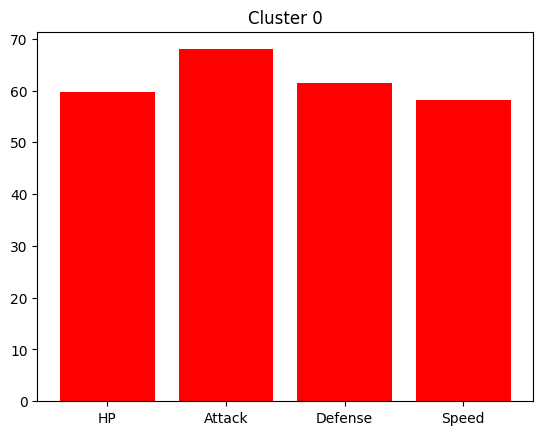

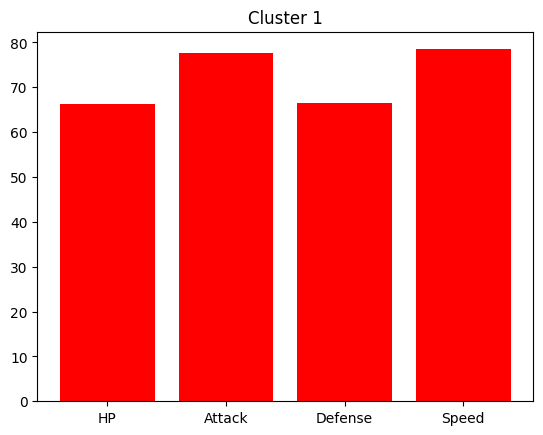

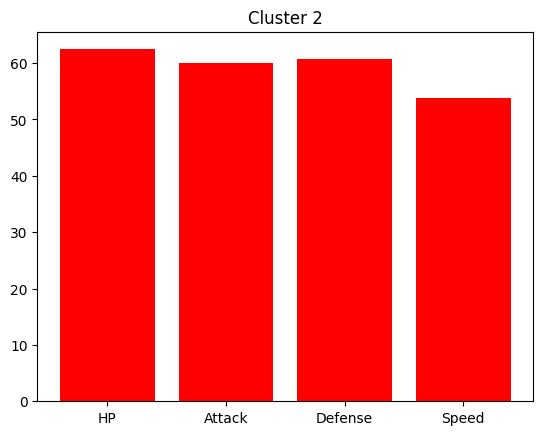

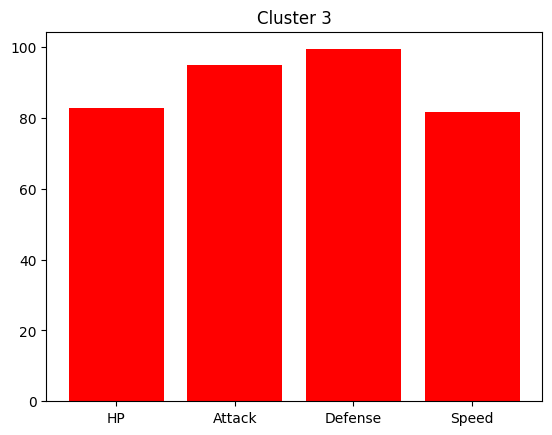

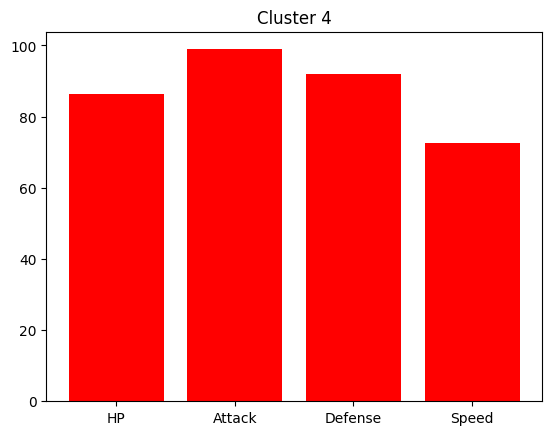

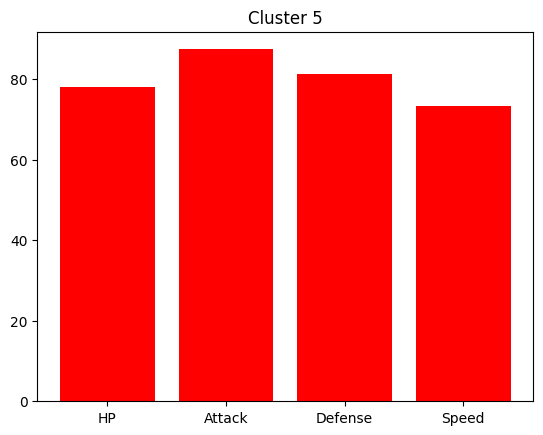

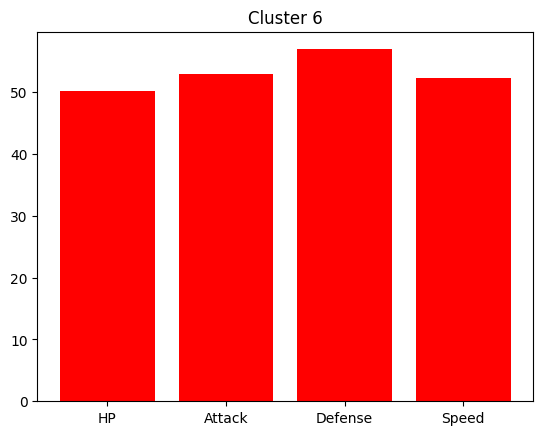

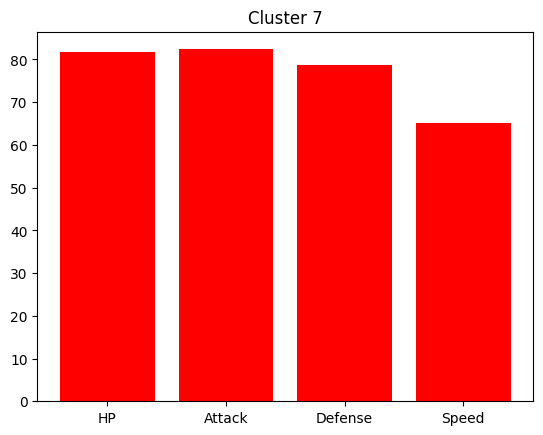

In [17]:
import matplotlib.pyplot as plt

atr = ['HP', 'Attack', 'Defense', 'Speed']
fig, ax = plt.subplots(nrows=1, ncols=1)
my_colors = 'rgbyk'

for i in range(8):        #k=8
  y = df[atr].loc[df['cluster_label'] == i].mean(axis=0).values    #los valores en promedio por cluster

  ax = plt.bar(x=atr, height=y, color='r')
  plt.title("Cluster {}".format(i))
  plt.show()

In [18]:
# EJERCICIO 5: tenemos que hacer graficos de barras pero ahora agrupando por el tamaño de los pokemones

#tamaño = # {entradas != 0 de la matriz de sprites}
#tengo que usar la matriz original, no aquella donde usamos PCA pues no estaria contando todos los pixeles

In [19]:
df['tamano'] = 0

for i, nombre in enumerate(nombres):            #imagenes y nombres tienen el mismo indice pues ambos vienen de data
  img_pokemon = imagenes[i]
  tamano = np.count_nonzero(img_pokemon)
  i_pok = df.loc[df['Name'] == nombre].index    #agarramos el indice donde el nombre coincide con el name del df de pokemons
  df['tamano'].iloc[i_pok] = tamano            #le asigno a cada uno la label que le corresponde

df

<ipython-input-19-620d74635297>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tamano'].iloc[i_pok] = tamano            #le asigno a cada uno la label que le corresponde


,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster_label,tamano
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2,193
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,222
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,4,391
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1,138
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,1,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,693,791,715,noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False,0,243
694,694,694,792,716,xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,5,263
695,695,695,793,717,yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1,272
696,696,696,795,719,diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,201


In [20]:
#primero normalicemos el tamaño para graficar mejor

t_max = df['tamano'].max()
t_min = df['tamano'].min()

# RECORDAR:  z = (x – mínimo (x)) / (máximo (x) – mínimo (x)) * 100.    ---- nos normaliza en escala 0-100

df['tamano norm'] = ((df['tamano'] - t_min)/(t_max - t_min))*100
df

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster_label,tamano,tamano norm
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,2,193,37.714286
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,222,46.000000
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,4,391,94.285714
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1,138,22.000000
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,1,194,38.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,693,791,715,noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False,0,243,52.000000
694,694,694,792,716,xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,5,263,57.714286
695,695,695,793,717,yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1,272,60.285714
696,696,696,795,719,diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,201,40.000000


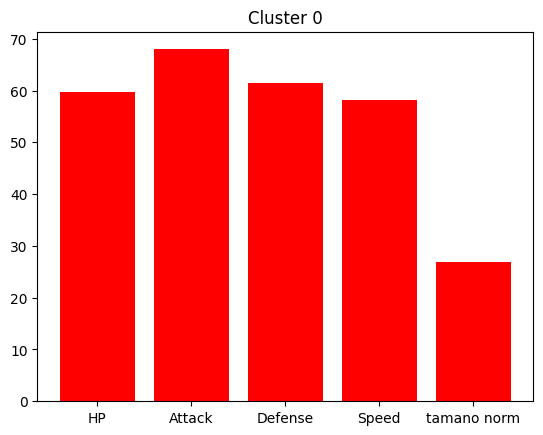

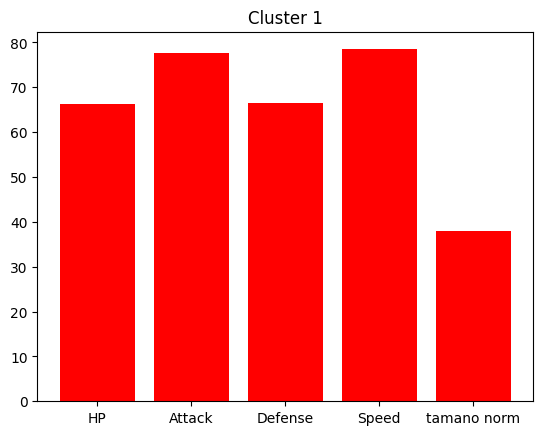

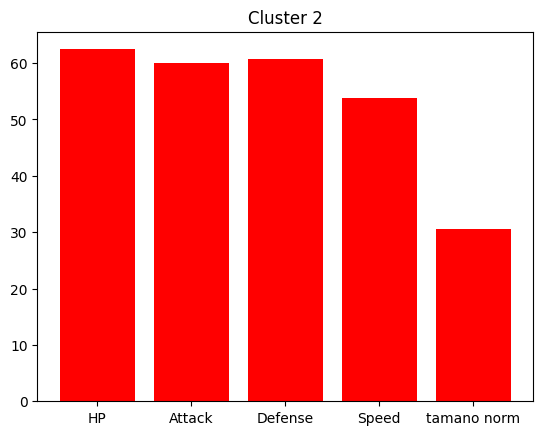

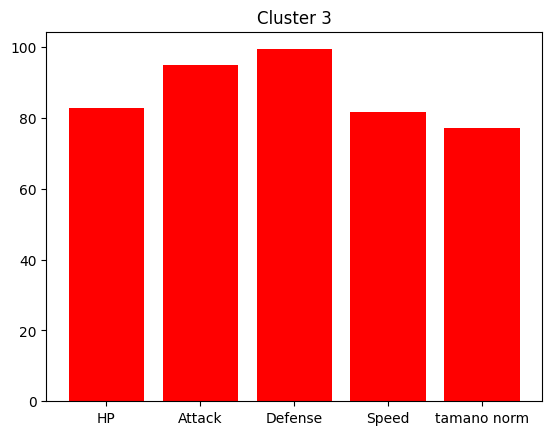

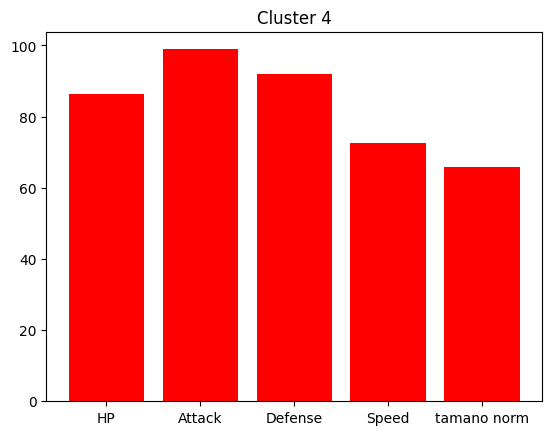

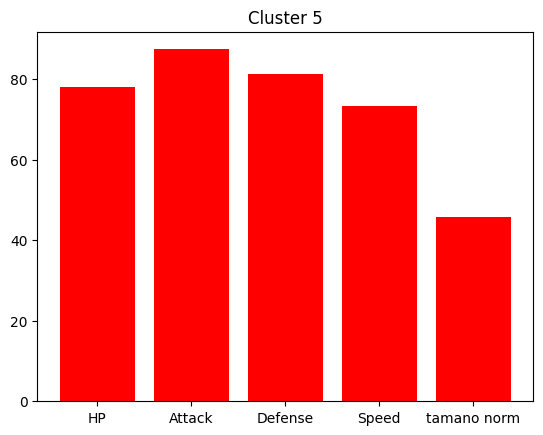

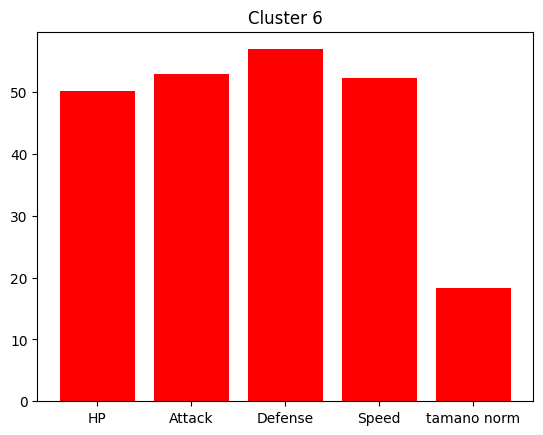

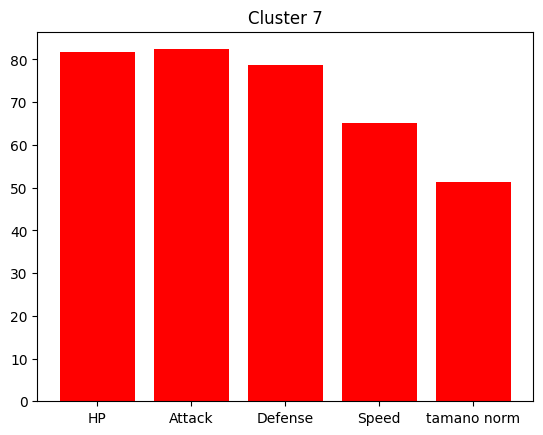

In [22]:
atr2 = ['HP', 'Attack', 'Defense', 'Speed', 'tamano norm']
fig, ax = plt.subplots(nrows=1, ncols=1)
my_colors = 'r'

for i in range(8):        #k=8
  y = df[atr2].loc[df['cluster_label'] == i].mean().values    #los valores en promedio por cluster

  ax = plt.bar(x=atr2, height=y, color=my_colors)
  plt.title("Cluster {}".format(i))
  plt.show()

In [23]:
#para responder a la pregunta de si los mas grandes son mas fuertes vamos a ver la correlacion lineal
#primero nos creamos una medida 'fortaleza' como el promedio de HP, Attack, Defense y Speed, Sp Atk y sp Def
from scipy.stats import pearsonr

df['fortaleza'] = (df['HP'] + df['Attack'] + df['Defense'] + df['Speed'] + df['Sp. Atk'] + df['Sp. Def'])/6

x_tam = df['tamano']   #pearson es independiente de la escala de los datos
y_fort = df['fortaleza']

corr = pearsonr(x_tam, y_fort)[0]
print('Pearson =', corr)

if corr < 0:
  concl = "La correlación entre el tamaño y la fortaleza es inversa."
elif corr == 0:
  concl = 'No hay correlación entre el tamaño y la fortaleza de los pokemones.'
elif corr > 0:
  concl = "La correlación entre el tamaño y la fortaleza es directa."


print(concl)
#siempre que lo corrí me dio que la correlación es directa

Pearson = 0.6768064357152188
La correlación entre el tamaño y la fortaleza es directa.


In [24]:
#EJERCICIO 6: gráfico de torta legendario vs no legedario x cluster

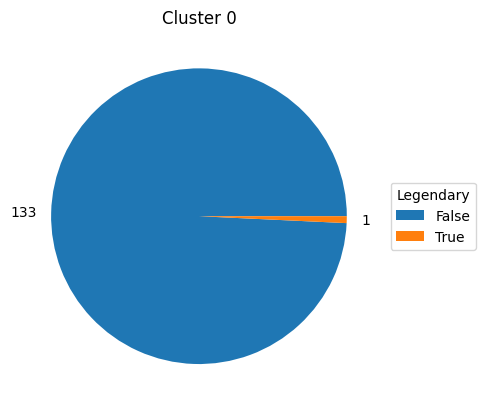

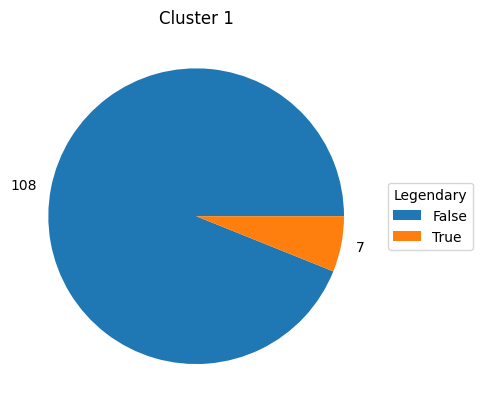

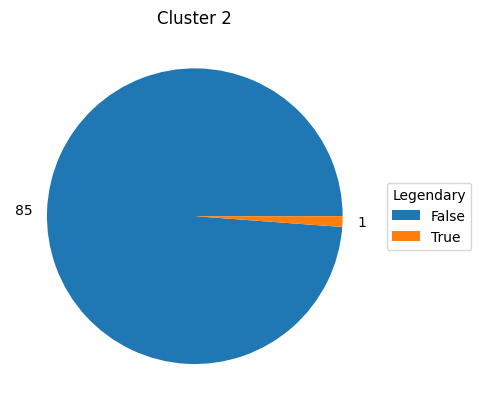

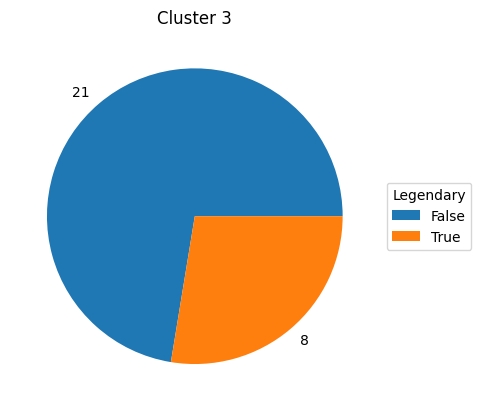

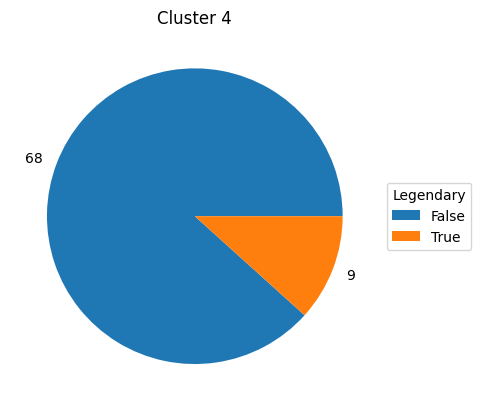

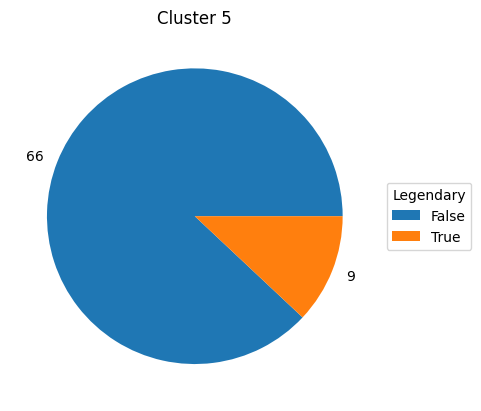

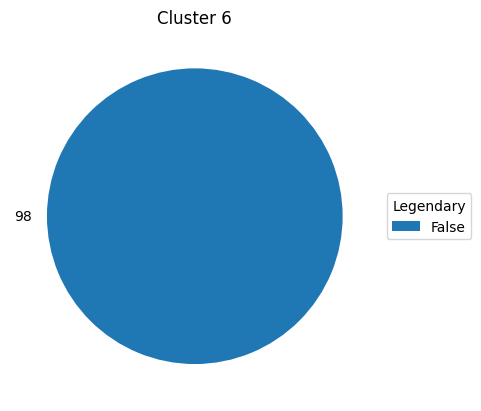

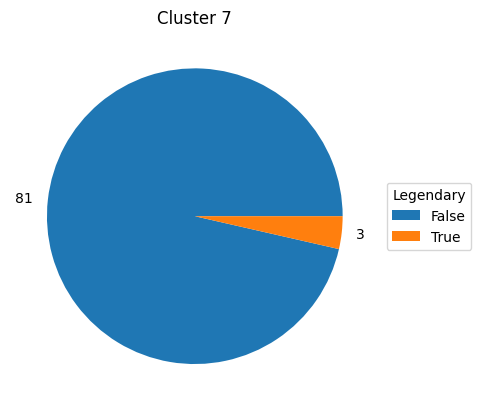

In [25]:
#ploteamos:

for i in range(8):    #k=8

  fig, ax = plt.subplots(1,1)
  x_data = df['Legendary'].loc[df['cluster_label'] == i].value_counts()     ## cantidad de legendarios por cluster

  ax = plt.pie(x_data, labels=x_data)               #nuesros plot iterados hasta k=8
  plt.legend(['False', 'True'], title="Legendary", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))      #leyenda
  plt.title("Cluster {}".format(i))       #titulo
  plt.show()

In [26]:
#veamos si el cluster con pokemones mas fuertes tiene mayor cantidad de legendarios:
#definimos un nuevo df donde agrupamos los datos or cluster.

df1 = df[['Legendary', 'cluster_label']].loc[df['Legendary'] == True].groupby(['cluster_label'], axis=0, as_index=False).count()
df1

df2 = df[['fortaleza', 'cluster_label']].groupby(['cluster_label'], axis=0, as_index=False).mean()
df2

df6 = df1.merge(df2, how="inner", on='cluster_label')   #esto nos da un mini df resumido con cantidad de legendary y promedio de fortaleza por cluster
df6                                                     #podemos ponernos a analizar

,cluster_label,Legendary,fortaleza
0,0,1,61.625622
1,1,7,70.936232
2,2,1,58.410853
3,3,8,88.304598
4,4,9,85.619048
5,5,9,81.320000
6,7,3,78.208333


In [27]:
#veamos cual es el cluster con mayor fortaleza
#y cual es el cluster con mayor q de legendary, a ver si coinciden:

max_leg = df6['cluster_label'].loc[df6['Legendary'] == max(df6['Legendary'])]
max_fort = df6['cluster_label'].loc[df6['fortaleza'] == max(df6['fortaleza'])]

cluster_max_leg = int(max_leg.mean())
cluster_max_fort = int(max_fort.mean())

print("Cluster con mayor cantidad de pokemones legendarios: {}".format(cluster_max_leg))
print("Cluster con mayor fortaleza en promedio: {}".format(cluster_max_fort))


#como kmeans es no-determinista, me resguardo la respuesta con este if then else
#no se como va a salir cuando lo corran, pero siempre que lo corrí yo me dio que el cluster con mayor cantidad de legendary es el que tiene mayor fortaleza promedio
if cluster_max_fort == cluster_max_leg:
  print("Sí, el cluster con más legendarios es el cluster con mayor fortaleza en promedio.")
else:
  print("No, el cluster con más legendarios no es el que tiene mayor fortaleza promedio.")

Cluster con mayor cantidad de pokemones legendarios: 4
Cluster con mayor fortaleza en promedio: 3
No, el cluster con más legendarios no es el que tiene mayor fortaleza promedio.
